## Homework12
#### 李佳慜 10235501405

country
United States     298663
Germany           177837
China              71450
France             58511
Canada             56920
Netherlands        51724
United Kingdom     49915
Czechia            47117
Japan              46054
Switzerland        37768
Name: count, dtype: int64


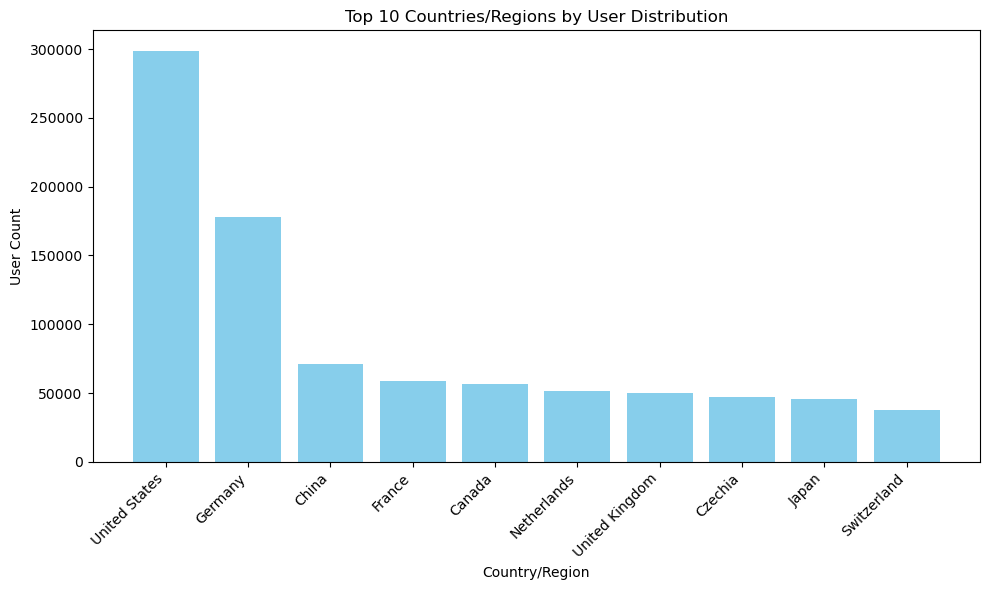

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from datetime import datetime, timedelta, timezone
import pytz
import re
import seaborn as sns 
# 读取数据
data_path = "D:\\save\\user_data\\users_combined_info_500.csv"
df = pd.read_csv(data_path)
# 删除重复的数据行
df = df.drop_duplicates()
# 统计国家和地区分布
country_counts = df['country'].value_counts()
print(country_counts.head(10))  # 显示前10个国家/地区

top_10_countries = country_counts.head(10)
countries = top_10_countries.index
counts = top_10_countries.values
# 绘制条形图
plt.figure(figsize=(10, 6))  # 设置图形大小
plt.bar(countries, counts, color='skyblue')  # 创建条形图
plt.xlabel('Country/Region')  # 设置x轴标签
plt.ylabel('User Count')  # 设置y轴标签
plt.title('Top 10 Countries/Regions by User Distribution')  # 设置图形标题
plt.xticks(rotation=45, ha='right')  # 旋转x轴标签，改善显示效果
plt.tight_layout()  # 自动调整子图参数，以充分利用图形空间
plt.show()  # 显示图形

city
Prague           38582
San Francisco    27321
Berlin           25747
New York         24050
Paris            18883
London           17249
Beijing          16373
Zurich           16255
Palo Alto        16149
Houston          15409
Name: count, dtype: int64


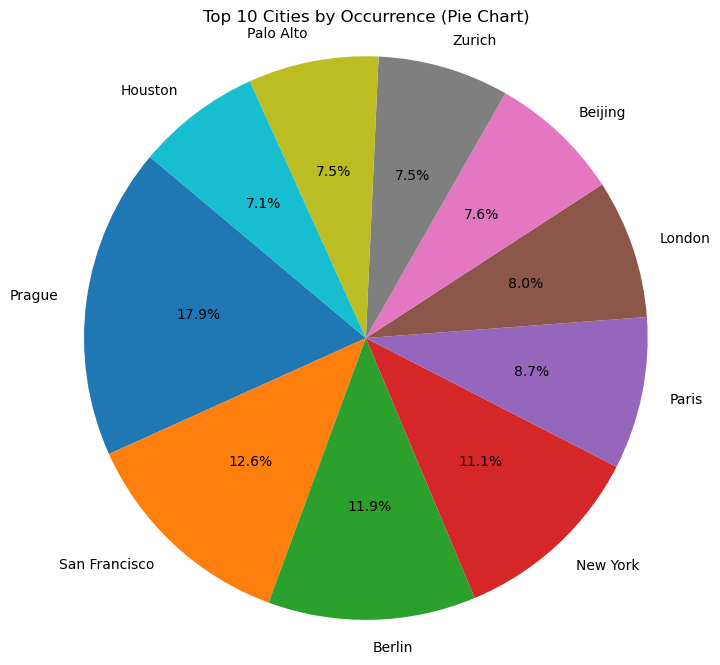

In [59]:
filtered_df = df[~df['location'].isin(['Germany', 'Japan','NYC'])].copy()

# 提取城市信息
# 如果location字段包含逗号，则取逗号前的部分作为城市；否则，整个字段即为城市
filtered_df['city'] = filtered_df['location'].apply(lambda x: x.split(',')[0].strip() if ',' in x else x.strip())

# 统计城市分布
city_counts = filtered_df['city'].value_counts()

# 显示前10个城市及其出现次数
print(city_counts.head(10))

cities = city_counts.head(10).index
counts = city_counts.head(10).values
# 绘制饼图
plt.figure(figsize=(8, 8))  # 设置图形大小
plt.pie(counts, labels=cities, autopct='%1.1f%%', startangle=140)  # autopct用于显示百分比，startangle用于旋转起始角度
plt.title('Top 10 Cities by Occurrence (Pie Chart)')  # 设置标题
plt.axis('equal')  # 确保饼图是圆形的
plt.show()  # 显示图形

In [22]:
df['timezone_offset'] = df['event_time'].apply(lambda x: re.search(r'(\+\d{2}:\d{2})', x).group(1) if '+' in x else 'UTC')

# 统计不同时区偏移量的数量
timezone_distribution = df['timezone_offset'].value_counts()

# 打印结果
print(timezone_distribution)

timezone_offset
+08:00    1245524
Name: count, dtype: int64



Top 5 Submitters:
      user_id                name  submit_count
345  11146458          MilosKozak         35532
52     158862             arlac77         35237
179   1580956          chenrui333         20214
448  40306929  ConfluentSemaphore         16149
454  43724913             taiki-e         14492

Bottom 5 Submitters:
      user_id         name  submit_count
130    814283   tmcconechy            75
232   3238291    Electroid           485
150   1133777    javsalgar           580
181   1609022  brophdawg11           599
475  62625502      Court72           621


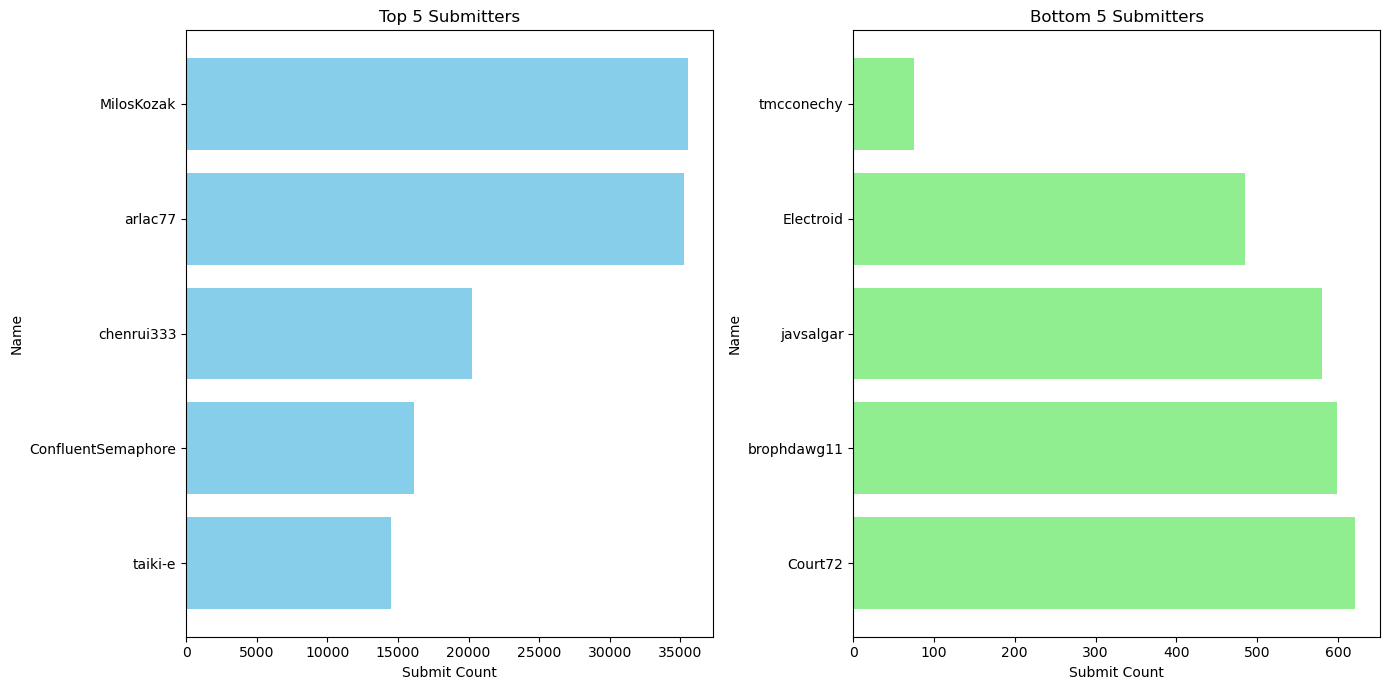

In [65]:
# 计算每个用户的提交次数
submit_counts = df.groupby(['user_id', 'name'])['event_time'].count().reset_index()
submit_counts.columns = ['user_id', 'name', 'submit_count']  # 注意这里添加了'name'列
 
# 获取前五高和前五低的用户
top_submitters = submit_counts.sort_values(by='submit_count', ascending=False).head(5)
bottom_submitters = submit_counts.sort_values(by='submit_count', ascending=True).head(5)
 
# 输出结果
print("\nTop 5 Submitters:")
print(top_submitters)
 
print("\nBottom 5 Submitters:")
print(bottom_submitters)
import matplotlib.pyplot as plt

# 设置图形大小和子图布局
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# 绘制前五高活跃用户的水平条形图
top_submitters['y_pos'] = range(1, len(top_submitters) + 1)  # 从上到下排列（实际上是水平条形图的x轴位置）
ax1.barh(top_submitters['y_pos'], top_submitters['submit_count'], height=0.8, color='skyblue')
ax1.set_title('Top 5 Submitters')
ax1.set_xlabel('Submit Count')
ax1.set_ylabel('Name')
ax1.set_yticks(top_submitters['y_pos'])
ax1.set_yticklabels(top_submitters['name'])
ax1.invert_yaxis()  # 反转y轴，使得第一个用户在最上面

# 绘制前五低活跃用户的水平条形图
bottom_submitters['y_pos'] = range(1, len(bottom_submitters) + 1)  # 同样从上到下排列（实际上是水平条形图的x轴位置）
ax2.barh(bottom_submitters['y_pos'], bottom_submitters['submit_count'], height=0.8, color='lightgreen')
ax2.set_title('Bottom 5 Submitters')
ax2.set_xlabel('Submit Count')
ax2.set_ylabel('Name')
ax2.set_yticks(bottom_submitters['y_pos'])
ax2.set_yticklabels(bottom_submitters['name'])
ax2.invert_yaxis()  # 反转y轴，使得第一个用户在最上面

# 调整布局以防止子图重叠
plt.tight_layout()

# 显示图形
plt.show()


Top 10 Influencers:
                name  total_influence
119           bdraco     1.911306e+07
52           arlac77     1.870270e+07
345       MilosKozak     1.844511e+07
63            frenck     1.700514e+07
179       chenrui333     1.508810e+07
162    charliermarsh     8.540971e+06
340            khipp     7.954755e+06
313  SuperSandro2000     7.572737e+06
40            fabaff     7.538915e+06
310         joostlek     7.465266e+06


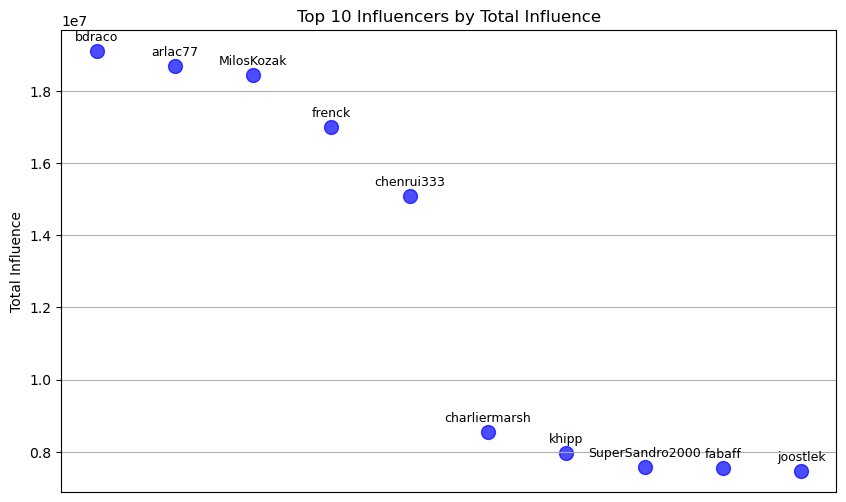

In [78]:
# 计算每个用户的总影响力
influence_per_user = df.groupby('user_id')['total_influence'].sum().reset_index()
influence_per_user.columns = ['user_id', 'total_influence']

# 获取一个包含user_id和name的唯一映射的DataFrame
user_names = df[['user_id', 'name']].drop_duplicates()

# 将影响力数据与用户名称关联起来
influence_with_names = influence_per_user.merge(user_names, on='user_id')

# 找出影响力最高和最低的10个用户
top_influencers = influence_with_names.sort_values(by='total_influence', ascending=False).head(10)

# 输出结果
print("\nTop 10 Influencers:")
print(top_influencers[['name', 'total_influence']]) 

names = top_influencers['name'].tolist()
total_influence = top_influencers['total_influence'].tolist()
 
# 设置图表大小和标题
plt.figure(figsize=(10, 6))
plt.title('Top 10 Influencers by Total Influence')
 
# 绘制散点图
plt.scatter(range(len(names)), total_influence, color='blue', alpha=0.7, s=100)
 
# 添加文本标签
for i, name in enumerate(names):
    # 为了避免标签与点重叠，调整y坐标
    plt.text(i, total_influence[i] + 2*1e5,  # 根据需要调整偏移量
             name, 
             fontsize=9, 
             ha='center', 
             va='bottom')
 
# 设置y轴标签和添加网格线
plt.ylabel('Total Influence')
plt.grid(True)
 
# 隐藏x轴标签和刻度
plt.xticks([])
 
# 显示图表
plt.show()


事件类型与事件动作的关联分析（前10个常见组合）:
                       event_type event_action   count
17                      PushEvent        added  394469
5               IssueCommentEvent      created  173514
16         PullRequestReviewEvent      created  143107
11               PullRequestEvent       closed  128783
1                     CreateEvent        added  100026
2                     DeleteEvent        added   89586
15  PullRequestReviewCommentEvent      created   85084
12               PullRequestEvent       opened   64375
6                     IssuesEvent       closed   35817
7                     IssuesEvent       opened   10371


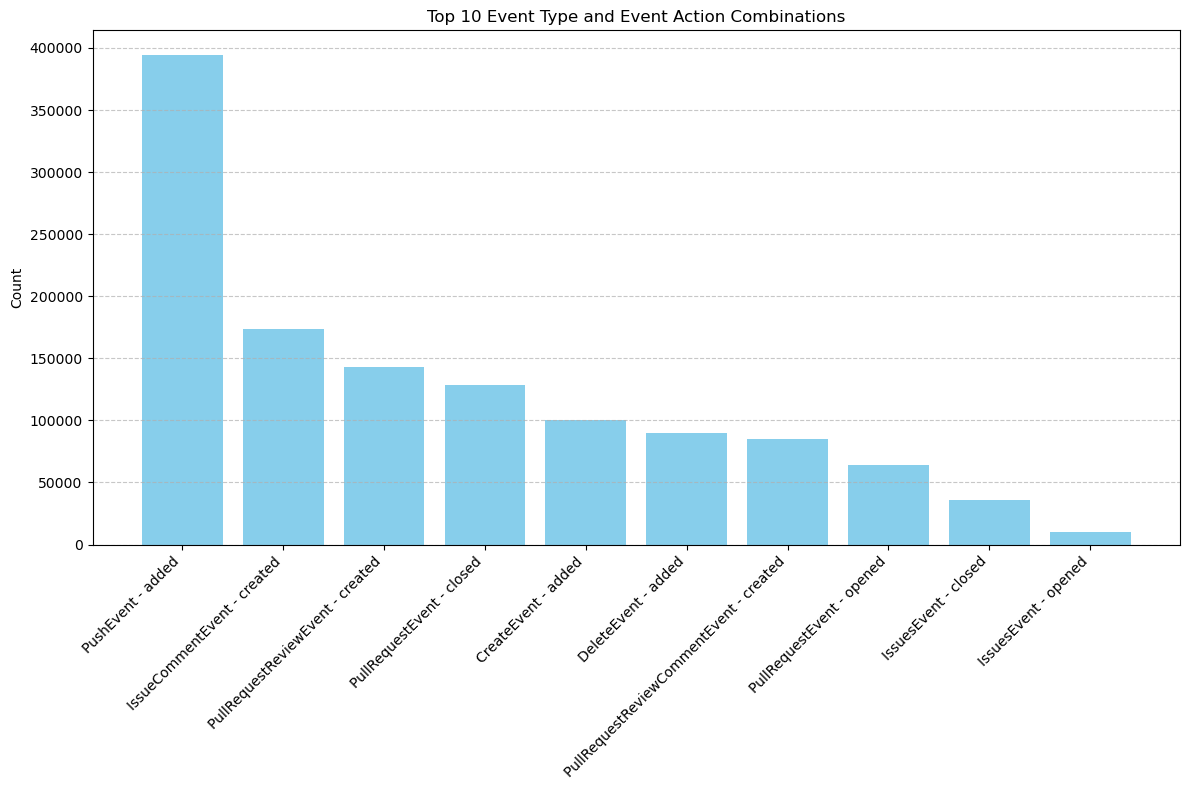

In [79]:
event_type_action_count = df.groupby(['event_type', 'event_action']).size().reset_index(name='count')
print("\n事件类型与事件动作的关联分析（前10个常见组合）:")
print(event_type_action_count.nlargest(10, 'count'))

data = [
    ('PushEvent', 'added', 394469),
    ('IssueCommentEvent', 'created', 173514),
    ('PullRequestReviewEvent', 'created', 143107),
    ('PullRequestEvent', 'closed', 128783),
    ('CreateEvent', 'added', 100026),
    ('DeleteEvent', 'added', 89586),
    ('PullRequestReviewCommentEvent', 'created', 85084),
    ('PullRequestEvent', 'opened', 64375),
    ('IssuesEvent', 'closed', 35817),
    ('IssuesEvent', 'opened', 10371)
]

# 提取事件类型和事件动作作为x轴标签，计数作为y轴值
event_types, event_actions, counts = zip(*data)

# 设置图表大小和标题
plt.figure(figsize=(12, 8))
plt.title('Top 10 Event Type and Event Action Combinations')

# 为了在x轴上显示完整的事件类型和事件动作组合，将它们连接起来
x_labels = [f'{etype} - {eaction}' for etype, eaction in zip(event_types, event_actions)]

# 绘制条形图
plt.bar(x_labels, counts, color='skyblue')

# 旋转x轴标签以避免重叠
plt.xticks(rotation=45, ha='right')

# 设置y轴标签和网格线
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图表
plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域
plt.show()